<a href="https://colab.research.google.com/github/phuocthok18/Mnist-Fashion_mnist-Cifar100-using-CNN/blob/main/BTVN_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN - Cifar100

169017344/169001437 [==============================] - 3s 0us/step


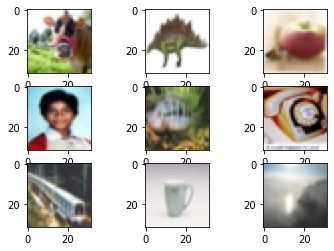

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 100)


In [ ]:
import keras
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import cifar100
from keras.models import Sequential, load_model

(x_train, y_train),(x_test, y_test) = cifar100.load_data()
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i], cmap = plt.get_cmap('gray'))
plt.show()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

In [ ]:
from keras.layers import Dense, Conv2D, Flatten
from keras.layers.pooling import MaxPooling2D
model = Sequential()
# khoi tich chap 1
model.add(Conv2D(32, (3, 3), activation= 'relu', kernel_initializer= 'he_uniform', padding ='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation= 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))
# khoi tich chap 2
model.add(Conv2D(64, (3, 3), activation= 'relu', kernel_initializer= 'he_uniform', padding ='same'))
model.add(Conv2D(64, (3, 3), activation= 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))

# CNN
from tensorflow.keras.optimizers import SGD
model.add(Flatten())
model.add(Dense(64, activation= 'relu', kernel_initializer= 'he_uniform'))
model.add(Dense(100, activation='softmax'))
model.summary()

opt = SGD(lr = 0.01, momentum =0.01)
model.compile(optimizer= opt, loss = 'categorical_crossentropy', metrics= ['accuracy'])
history = model.fit(x_train, y_train, epochs = 30, batch_size = 10, validation_data = (x_test, y_test), verbose = 1)
model.save('CNN_cifar100.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/30
5000/5000 [==============================] - 357s 71ms/step - loss: 4.1076 - accuracy: 0.0796 - val_loss: 3.5904 - val_accuracy: 0.1575
Epoch 2/30
5000/5000 [==============================] - 326s 65ms/step - loss: 3.3298 - accuracy: 0.1961 - val_loss: 3.1877 - val_accuracy: 0.2234
Epoch 3/30
5000/5000 [==============================] - 318s 64ms/step - loss: 2.9140 - accuracy: 0.2752 - val_loss: 2.8287 - val_accuracy: 0.2920
Epoch 4/30
5000/5000 [==============================] - 317s 63ms/step - loss: 2.6110 - accuracy: 0.3367 - val_loss: 2.7015 - val_accuracy: 0.3299
Epoch 5/30
5000/5000 [==============================] - 317s 63ms/step - loss: 2.3749 - accuracy: 0.3842 - val_loss: 2.6129 - val_accuracy: 0.3459
Epoch 6/30
5000/5000 [==============================] - 317s 63ms/step - loss: 2.1667 - accuracy: 0.4312 - val_loss: 2.5467 - val_accuracy: 0.3630
Epoch 7/30
5000/5000 [==============================] - 317s 63ms/step - loss: 1.9848 - accuracy: 0.4692 - val_loss: 2

In [ ]:
Score = model.evaluate(x_test, y_test, verbose=0)
print('Sai số kiểm tra: ', Score[0])
print('Độ chính xác kiểm tra:', Score[1])

Sai số kiểm tra:  6.174818992614746
Độ chính xác kiểm tra: 0.31779998540878296


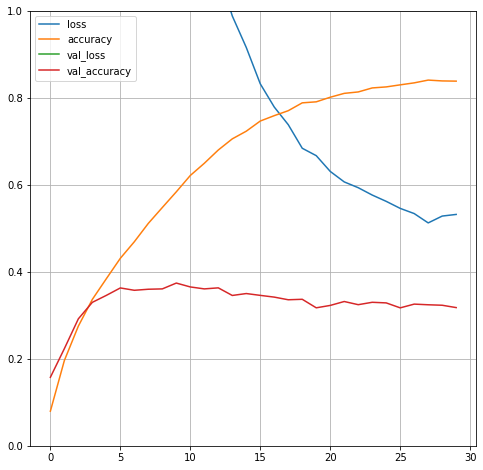

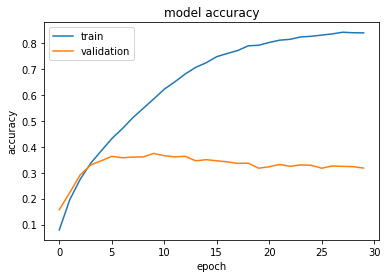

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize= (8,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()

In [ ]:
from google.colab import files
img = files.upload()

Saving apple.jpg to apple.jpg


This image is apple


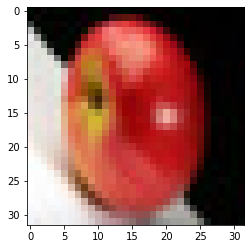

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np
model500 = load_model('CNN_cifar100.h5')
# , target_size = (32, 32)
img = load_img('apple.jpg', target_size = (32, 32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32,32,3)
img = img.astype('float32')
img /= 255
pred = int(np.argmax(model500.predict(img), axis = 1))
a = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm']
# print("This image is a", a[pred])
print('This image is',a[pred])

CNN - MNIST

11501568/11490434 [==============================] - 1s 0us/step


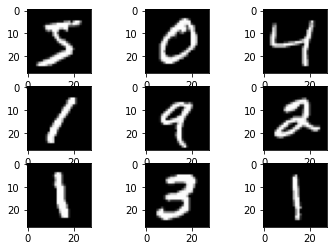

Number of images in x_train (60000, 28, 28, 1)
Number of images in x_test (10000, 28, 28, 1)


In [ ]:
import keras
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential, load_model

# tai du lieu huan luyen va du lieu danh gia cho mo hinh
(x_train, y_train), (x_test, y_test) = mnist.load_data()
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i], cmap = plt.get_cmap('gray'))
plt.show()
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1, 28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print('Number of images in x_train', x_train.shape)
print('Number of images in x_test', x_test.shape)

In [ ]:
from keras.layers import Dense, Conv2D, Flatten, Dropout, Activation
from keras.layers.pooling import MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation='relu', kernel_initializer='he_uniform', input_shape= (28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

from tensorflow.keras.optimizers import SGD

opt = SGD( learning_rate = 0.01, momentum = 0.9)
model.compile(optimizer= opt, loss = 'categorical_crossentropy', metrics= ['accuracy'])
model.summary()
history1 = model.fit(x_train, y_train, epochs=20, batch_size = 64, validation_data = (x_test, y_test), verbose = 1)
model.save('CNN_mnist.h5')
print('Save file')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
Score = model.evaluate(x_test, y_test, verbose=0)
print('Sai số kiểm tra: ', Score[0])
print('Độ chính xác kiểm tra:', Score[1])

Sai số kiểm tra:  0.030570629984140396
Độ chính xác kiểm tra: 0.9925000071525574


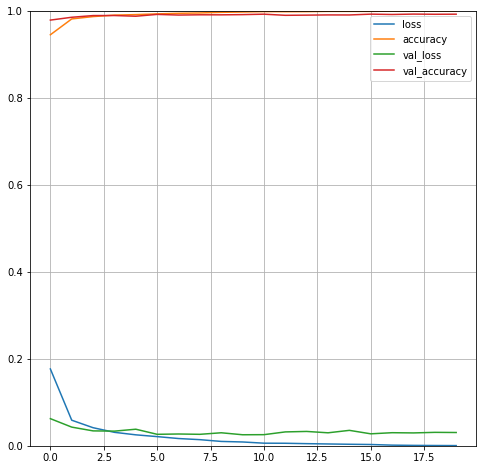

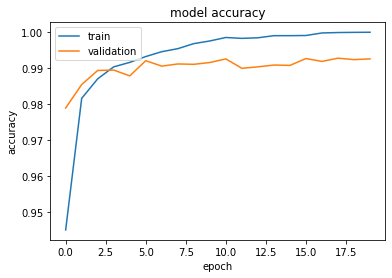

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history1.history).plot(figsize= (8,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()

In [ ]:
from google.colab import files
img = files.upload()

Saving so0.jpg to so0 (1).jpg


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


So 0


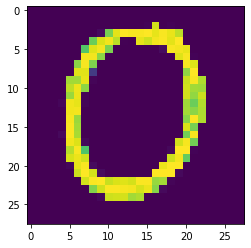

In [ ]:
#---------sua lai
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np
model = load_model('CNN_mnist.h5')
# , target_size = (32, 32)
img = load_img('so0.jpg', grayscale=True, target_size = (28, 28))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,28,28,1)
img = img.astype('float32')
img /= 255
pred = int(np.argmax(model.predict(img), axis = 1))
a = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# print("This image is a", a[pred])
print("So",a[pred])

CNN - Fashion_mnist

4431872/4422102 [==============================] - 0s 0us/step


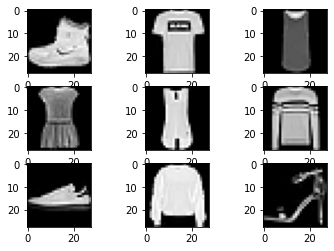

Number of images in x_train (60000, 28, 28, 1)
Number of images in x_test (10000, 28, 28, 1)


In [ ]:
import keras
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import fashion_mnist
from keras.models import Sequential, load_model

# tai du lieu huan luyen va du lieu danh gia cho mo hinh
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i], cmap = plt.get_cmap('gray'))
plt.show()
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print('Number of images in x_train', x_train.shape)
print('Number of images in x_test', x_test.shape)

In [ ]:
from keras.layers import Dense, Conv2D, Flatten, Dropout, Activation
from keras.layers.pooling import MaxPooling2D

model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape= (28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
from tensorflow.keras.optimizers import SGD

opt = SGD( learning_rate = 0.01, momentum = 0.9)
model.compile(optimizer= opt, loss = 'categorical_crossentropy', metrics= ['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size = 128, validation_data = (x_test, y_test), verbose = 1)
model.save('CNN_fashion_mnist.h5')

Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 0.3842 - accuracy: 0.8597 - val_loss: 0.4196 - val_accuracy: 0.8456
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3459 - accuracy: 0.8730 - val_loss: 0.3544 - val_accuracy: 0.8707
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3211 - accuracy: 0.8818 - val_loss: 0.3417 - val_accuracy: 0.8783
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3048 - accuracy: 0.8887 - val_loss: 0.3254 - val_accuracy: 0.8819
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2843 - accuracy: 0.8961 - val_loss: 0.3149 - val_accuracy: 0.8864
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2703 - accuracy: 0.9013 - val_loss: 0.3101 - val_accuracy: 0.8902
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2577 - accuracy: 0.9046 - val_loss: 0.3076 - val_accuracy: 0.8867
Epoch 

In [ ]:
Score = model.evaluate(x_test, y_test, verbose=0)
print('Sai số kiểm tra: ', Score[0])
print('Độ chính xác kiểm tra:', Score[1])

Sai số kiểm tra:  0.26056307554244995
Độ chính xác kiểm tra: 0.9120000004768372


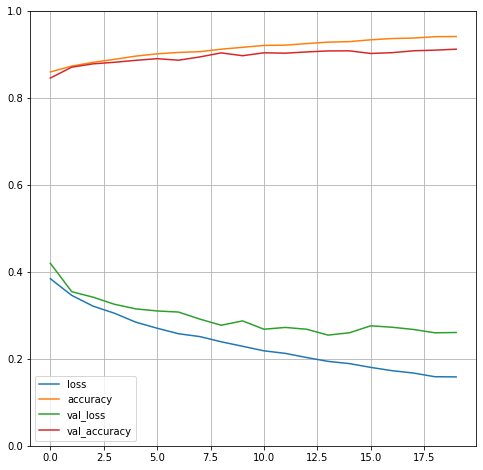

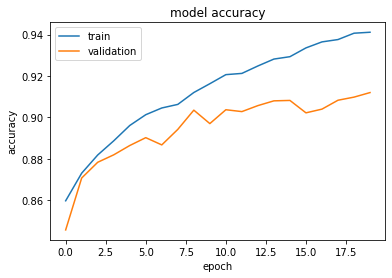

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize= (8,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()

In [ ]:
from google.colab import files
img = files.upload()

Saving T_shirt.jpg to T_shirt.jpg


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Image: T-shirt/top


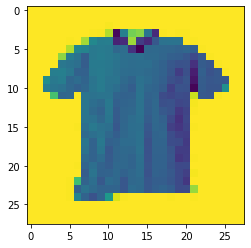

In [ ]:
# Nhận dạng
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np
model1000 = load_model('CNN_fashion_mnist.h5')
# , target_size = (32, 32)
img = load_img('T_shirt.jpg', grayscale=True, target_size = (28, 28))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,28,28,1)
img = img.astype('float32')
img /= 255
pred = int(np.argmax(model1000.predict(img), axis = 1))
a = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# print("This image is a", a[pred])
print('Image:',a[pred])